In [1]:
import mlrose_hiive as mlrose

In [2]:
import pkgutil
import mlrose_hiive.generators

def list_generator_files(module):
    package_path = module.__path__
    for _, module_name, is_pkg in pkgutil.iter_modules(package_path):
        print(module_name)
        if is_pkg:
            sub_module = f"{module.__name__}.{module_name}"
            list_generator_files(__import__(sub_module, fromlist=[""]))

# List all generator files
list_generator_files(mlrose_hiive.generators)

continuous_peaks_generator
flip_flop_generator
four_peaks_generator
knapsack_generator
max_k_color_generator
one_max_generator
queens_generator
tsp_generator


In [3]:
from mlrose_hiive.generators import four_peaks_generator

In [11]:
from mlrose_hiive.generators.four_peaks_generator import FourPeaksGenerator

In [5]:
import pandas as pd
import numpy as np
import joblib
from tqdm import tqdm
import time

In [6]:
import sklearn

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from mlrose_hiive.fitness._discrete_peaks_base import _DiscretePeaksBase

#### Notes for mlrose-hiive library:
- rhc.py, sa.py, ga.py -- core implementations for those algos
- **Runners** -- utility classes used to streamline those **algos** executions. Manage configs, run experiments, collect results and have interface for easy execution
- **Generators** -- used to generate initial states or problem instances for the **optimization process**. Help create the initial config needed to start the optimization process. 

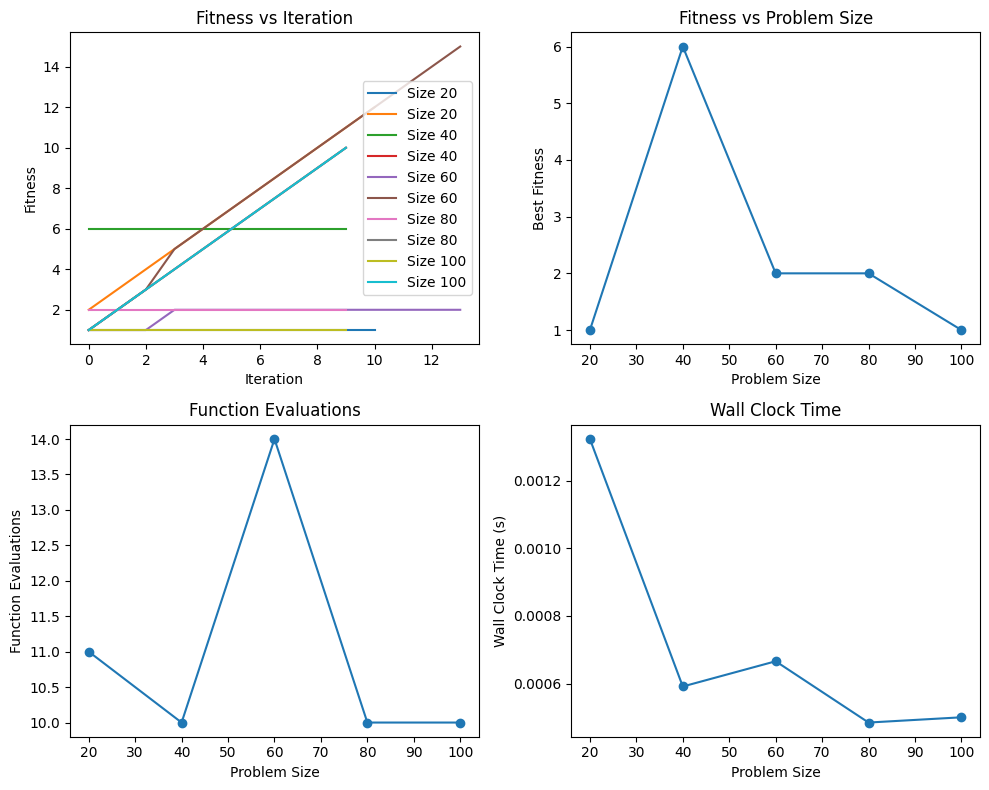

In [5]:
# Define a function to run the experiment
def run_rhc_experiment(problem_size):
    fitness = mlrose.FourPeaks(t_pct=0.15)
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)

    # Run RHC
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, curve=True)
    end_time = time.time()

    # Gather results
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    
    return best_fitness, fitness_curve, function_evaluations, run_time

# Run experiments for different problem sizes
problem_sizes = [20, 40, 60, 80, 100]
results = []

for size in problem_sizes:
    best_fitness, fitness_curve, function_evaluations, run_time = run_experiment(size)
    results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })

# Plot results
plt.figure(figsize=(10, 8))

# Fitness vs Iteration
plt.subplot(2, 2, 1)
for result in results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('Fitness vs Iteration')
plt.legend()

# Fitness vs Problem Size
plt.subplot(2, 2, 2)
plt.plot(problem_sizes, [result['best_fitness'] for result in results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness')
plt.title('Fitness vs Problem Size')

# Function Evaluations
plt.subplot(2, 2, 3)
plt.plot(problem_sizes, [result['function_evaluations'] for result in results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Function Evaluations')
plt.title('Function Evaluations')

# Wall Clock Time
plt.subplot(2, 2, 4)
plt.plot(problem_sizes, [result['run_time'] for result in results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Wall Clock Time (s)')
plt.title('Wall Clock Time')

plt.tight_layout()
plt.show()


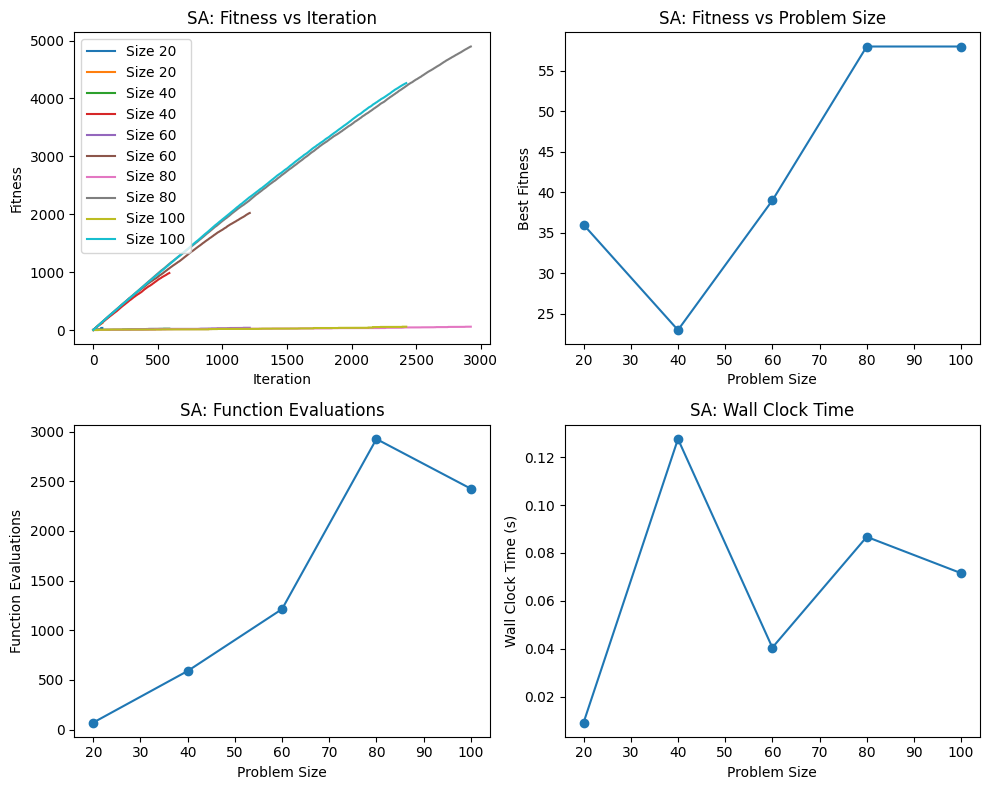

In [6]:
# Function to run SA experiment
def run_sa_experiment(problem_size):
    fitness = mlrose.FourPeaks(t_pct=0.15)
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    
    schedule = mlrose.ExpDecay()
    
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, curve=True)
    end_time = time.time()
    
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    
    return best_fitness, fitness_curve, function_evaluations, run_time

# Run experiments for different problem sizes
problem_sizes = [20, 40, 60, 80, 100]
sa_results = []

for size in problem_sizes:
    best_fitness, fitness_curve, function_evaluations, run_time = run_sa_experiment(size)
    sa_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })

# Plot results for SA
plt.figure(figsize=(10, 8))

# Fitness vs Iteration
plt.subplot(2, 2, 1)
for result in sa_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('SA: Fitness vs Iteration')
plt.legend()

# Fitness vs Problem Size
plt.subplot(2, 2, 2)
plt.plot(problem_sizes, [result['best_fitness'] for result in sa_results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness')
plt.title('SA: Fitness vs Problem Size')

# Function Evaluations
plt.subplot(2, 2, 3)
plt.plot(problem_sizes, [result['function_evaluations'] for result in sa_results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Function Evaluations')
plt.title('SA: Function Evaluations')

# Wall Clock Time
plt.subplot(2, 2, 4)
plt.plot(problem_sizes, [result['run_time'] for result in sa_results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Wall Clock Time (s)')
plt.title('SA: Wall Clock Time')

plt.tight_layout()
plt.show()


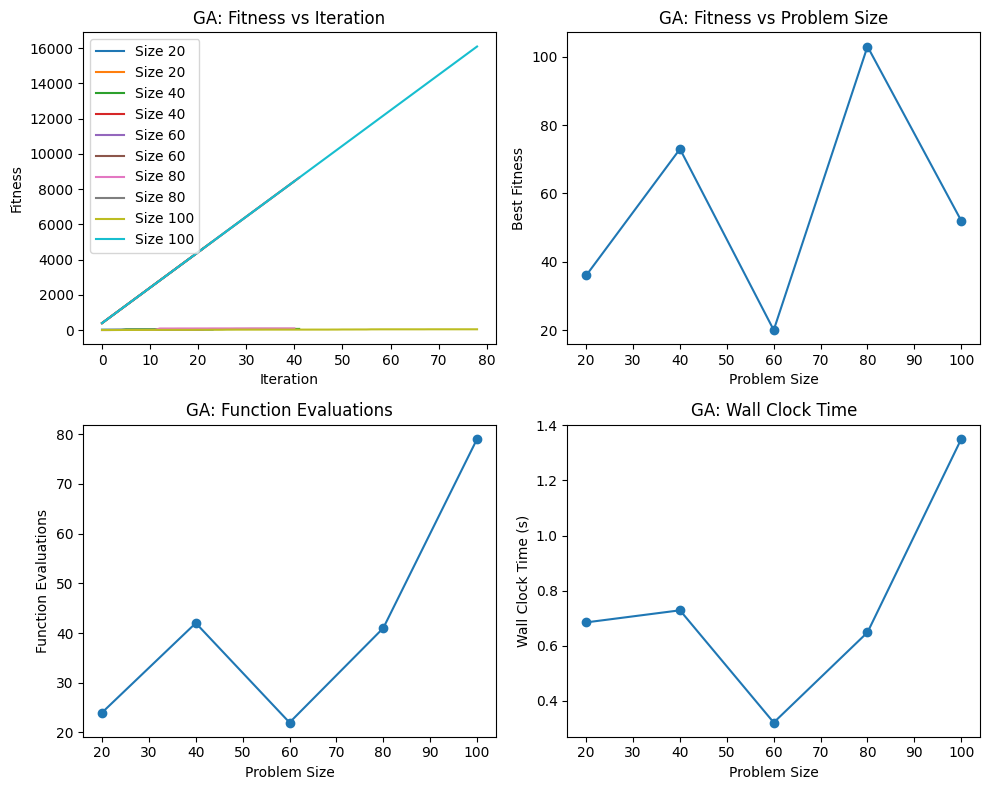

In [7]:
# Function to run GA experiment
def run_ga_experiment(problem_size):
    fitness = mlrose.FourPeaks(t_pct=0.15)
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size=200, mutation_prob=0.1, curve=True)
    end_time = time.time()
    
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    
    return best_fitness, fitness_curve, function_evaluations, run_time

# Run experiments for different problem sizes
problem_sizes = [20, 40, 60, 80, 100]
ga_results = []

for size in problem_sizes:
    best_fitness, fitness_curve, function_evaluations, run_time = run_ga_experiment(size)
    ga_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })

# Plot results for GA
plt.figure(figsize=(10, 8))

# Fitness vs Iteration
plt.subplot(2, 2, 1)
for result in ga_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('GA: Fitness vs Iteration')
plt.legend()

# Fitness vs Problem Size
plt.subplot(2, 2, 2)
plt.plot(problem_sizes, [result['best_fitness'] for result in ga_results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness')
plt.title('GA: Fitness vs Problem Size')

# Function Evaluations
plt.subplot(2, 2, 3)
plt.plot(problem_sizes, [result['function_evaluations'] for result in ga_results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Function Evaluations')
plt.title('GA: Function Evaluations')

# Wall Clock Time
plt.subplot(2, 2, 4)
plt.plot(problem_sizes, [result['run_time'] for result in ga_results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Wall Clock Time (s)')
plt.title('GA: Wall Clock Time')

plt.tight_layout()
plt.show()


#### Basic experiment without generator or runners, a naive run to see how RHC, SA, GA performs on 4peaks

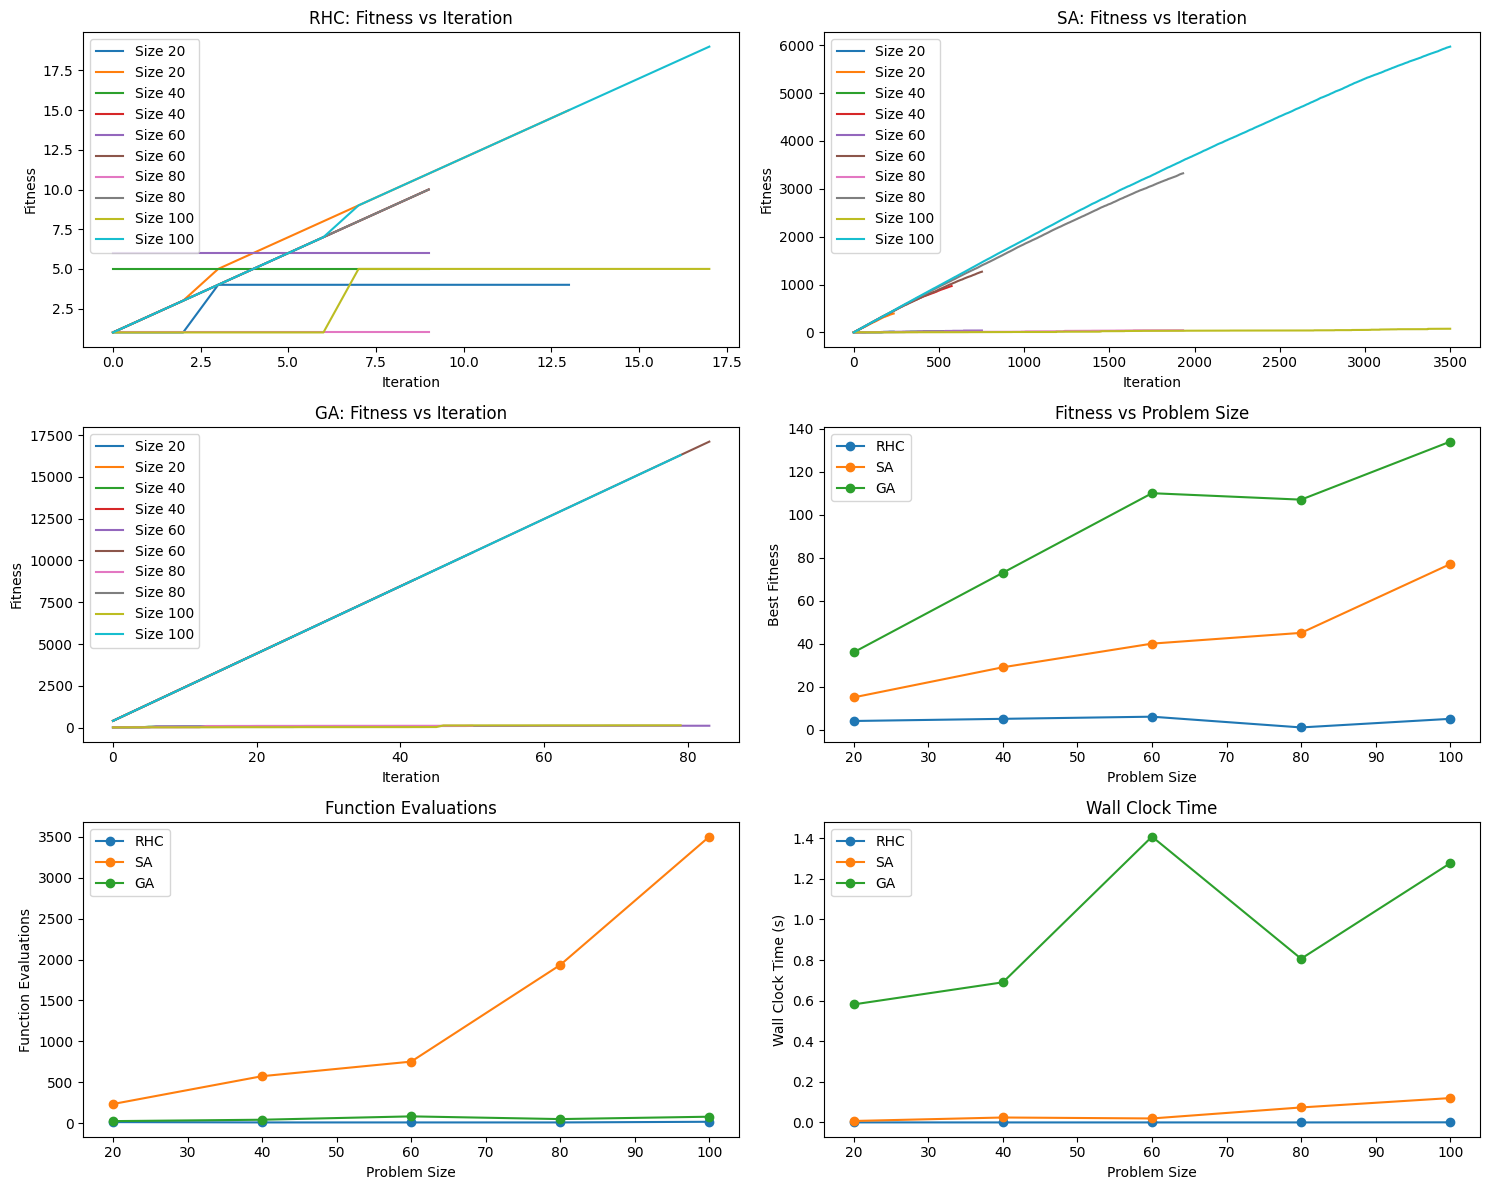

In [8]:
# Define the fitness function globally
fitness = mlrose.FourPeaks(t_pct=0.15)

# Function to run RHC experiment
def run_rhc_experiment(problem_size):
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, curve=True)
    end_time = time.time()
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    return best_fitness, fitness_curve, function_evaluations, run_time

# Function to run SA experiment
def run_sa_experiment(problem_size):
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    schedule = mlrose.ExpDecay()
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, curve=True)
    end_time = time.time()
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    return best_fitness, fitness_curve, function_evaluations, run_time

# Function to run GA experiment
def run_ga_experiment(problem_size):
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size=200, mutation_prob=0.1, curve=True)
    end_time = time.time()
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    return best_fitness, fitness_curve, function_evaluations, run_time

# Run experiments for different problem sizes
problem_sizes = [20, 40, 60, 80, 100]
rhc_results = []
sa_results = []
ga_results = []

for size in problem_sizes:
    best_fitness, fitness_curve, function_evaluations, run_time = run_rhc_experiment(size)
    rhc_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })
    best_fitness, fitness_curve, function_evaluations, run_time = run_sa_experiment(size)
    sa_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })
    best_fitness, fitness_curve, function_evaluations, run_time = run_ga_experiment(size)
    ga_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })

# Plot results
plt.figure(figsize=(15, 12))

# Fitness vs Iteration
plt.subplot(3, 2, 1)
for result in rhc_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('RHC: Fitness vs Iteration')
plt.legend()

plt.subplot(3, 2, 2)
for result in sa_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('SA: Fitness vs Iteration')
plt.legend()

plt.subplot(3, 2, 3)
for result in ga_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('GA: Fitness vs Iteration')
plt.legend()

# Fitness vs Problem Size
plt.subplot(3, 2, 4)
plt.plot(problem_sizes, [result['best_fitness'] for result in rhc_results], marker='o', label='RHC')
plt.plot(problem_sizes, [result['best_fitness'] for result in sa_results], marker='o', label='SA')
plt.plot(problem_sizes, [result['best_fitness'] for result in ga_results], marker='o', label='GA')
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness')
plt.title('Fitness vs Problem Size')
plt.legend()

# Function Evaluations
plt.subplot(3, 2, 5)
plt.plot(problem_sizes, [result['function_evaluations'] for result in rhc_results], marker='o', label='RHC')
plt.plot(problem_sizes, [result['function_evaluations'] for result in sa_results], marker='o', label='SA')
plt.plot(problem_sizes, [result['function_evaluations'] for result in ga_results], marker='o', label='GA')
plt.xlabel('Problem Size')
plt.ylabel('Function Evaluations')
plt.title('Function Evaluations')
plt.legend()

# Wall Clock Time
plt.subplot(3, 2, 6)
plt.plot(problem_sizes, [result['run_time'] for result in rhc_results], marker='o', label='RHC')
plt.plot(problem_sizes, [result['run_time'] for result in sa_results], marker='o', label='SA')
plt.plot(problem_sizes, [result['run_time'] for result in ga_results], marker='o', label='GA')
plt.xlabel('Problem Size')
plt.ylabel('Wall Clock Time (s)')
plt.title('Wall Clock Time')
plt.legend()

plt.tight_layout()
plt.show()


Running experiments: 100%|███████████████████████| 5/5 [15:50<00:00, 190.07s/it]


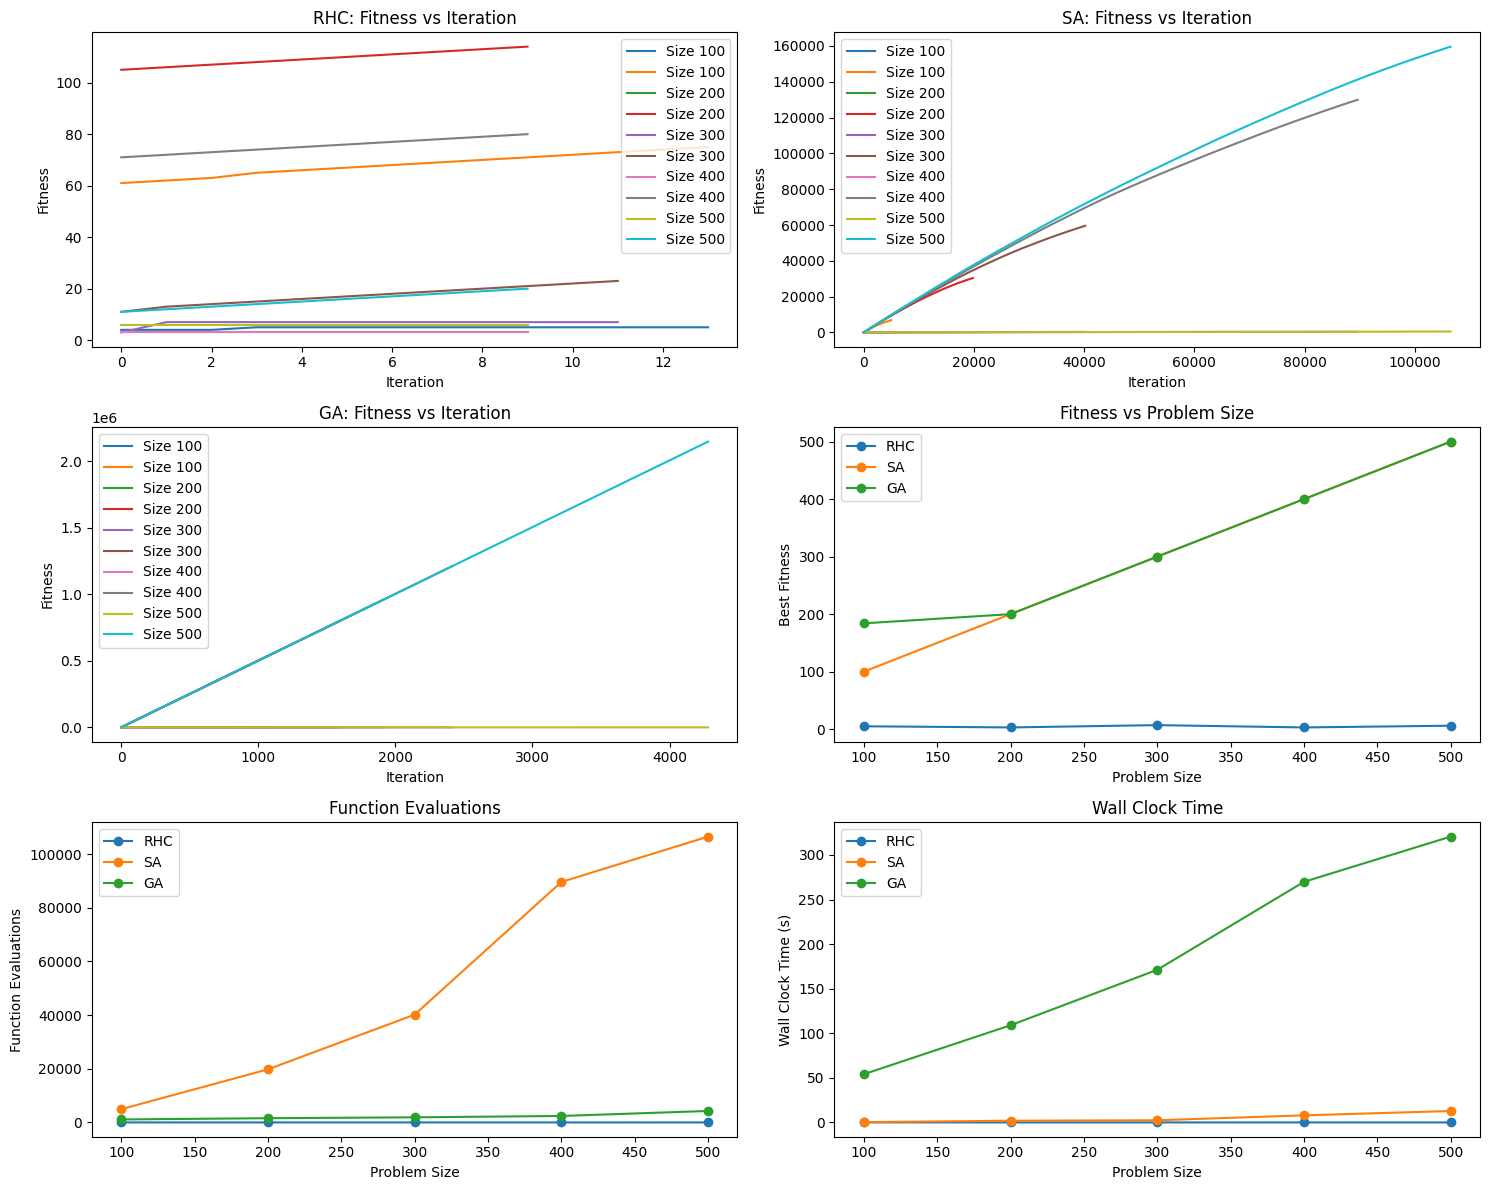

In [11]:
# Define the fitness function globally
fitness = mlrose.FourPeaks(t_pct=0.15)

# Function to run RHC experiment
def run_rhc_experiment(problem_size):
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, restarts=10, curve=True)
    end_time = time.time()
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    return best_fitness, fitness_curve, function_evaluations, run_time

# Function to run SA experiment
def run_sa_experiment(problem_size):
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    schedule = mlrose.ExpDecay()
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=1000, curve=True)
    end_time = time.time()
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    return best_fitness, fitness_curve, function_evaluations, run_time

# Function to run GA experiment
def run_ga_experiment(problem_size):
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size=500, mutation_prob=0.2, max_attempts=1000, curve=True)
    end_time = time.time()
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    return best_fitness, fitness_curve, function_evaluations, run_time

# Run experiments for different problem sizes
problem_sizes = [100, 200, 300, 400, 500]
rhc_results = []
sa_results = []
ga_results = []

for size in tqdm(problem_sizes, desc="Running experiments"):
    best_fitness, fitness_curve, function_evaluations, run_time = run_rhc_experiment(size)
    rhc_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })
    best_fitness, fitness_curve, function_evaluations, run_time = run_sa_experiment(size)
    sa_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })
    best_fitness, fitness_curve, function_evaluations, run_time = run_ga_experiment(size)
    ga_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })

# Plot results
plt.figure(figsize=(15, 12))

# Fitness vs Iteration for RHC
plt.subplot(3, 2, 1)
for result in rhc_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('RHC: Fitness vs Iteration')
plt.legend()

# Fitness vs Iteration for SA
plt.subplot(3, 2, 2)
for result in sa_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('SA: Fitness vs Iteration')
plt.legend()

# Fitness vs Iteration for GA
plt.subplot(3, 2, 3)
for result in ga_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('GA: Fitness vs Iteration')
plt.legend()

# Fitness vs Problem Size
plt.subplot(3, 2, 4)
plt.plot(problem_sizes, [result['best_fitness'] for result in rhc_results], marker='o', label='RHC')
plt.plot(problem_sizes, [result['best_fitness'] for result in sa_results], marker='o', label='SA')
plt.plot(problem_sizes, [result['best_fitness'] for result in ga_results], marker='o', label='GA')
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness')
plt.title('Fitness vs Problem Size')
plt.legend()

# Function Evaluations
plt.subplot(3, 2, 5)
plt.plot(problem_sizes, [result['function_evaluations'] for result in rhc_results], marker='o', label='RHC')
plt.plot(problem_sizes, [result['function_evaluations'] for result in sa_results], marker='o', label='SA')
plt.plot(problem_sizes, [result['function_evaluations'] for result in ga_results], marker='o', label='GA')
plt.xlabel('Problem Size')
plt.ylabel('Function Evaluations')
plt.title('Function Evaluations')
plt.legend()

# Wall Clock Time
plt.subplot(3, 2, 6)
plt.plot(problem_sizes, [result['run_time'] for result in rhc_results], marker='o', label='RHC')
plt.plot(problem_sizes, [result['run_time'] for result in sa_results], marker='o', label='SA')
plt.plot(problem_sizes, [result['run_time'] for result in ga_results], marker='o', label='GA')
plt.xlabel('Problem Size')
plt.ylabel('Wall Clock Time (s)')
plt.title('Wall Clock Time')
plt.legend()

plt.tight_layout()
plt.show()


These graphs tell me that: 
- RHC struggles to find high fitness values, even as the problem size increases. The fitness improves slowly. 
- SA finds higher fitness values compared to RHC, but it takes longer and improves its fitness steadily over iterations.
- GA finds the highest fitness quickly and efficiently, which means it's efficient in finding the optimal solution for larger problem sizes. 

In terms of **problem size**: 
- GA consistently outperforms RHC and SA, especially for larger problem size. SA performs better than RHC for larger problem size. 

In terms of **FEvals**: 
- GA takes the longest, especially as problem size increases. RHC is the fastest.

SA seems to be the best balanced in terms of performance but requires more evaluation. Compared to RHC, it's more effective, but faster. Compared to GA, it's faster, but isn't as optimal. 

#### first, define 4peaks with the generator class - seed 428

The below code is taken directly from the mlrose-hiive library. The four-peaks generator class wasn't installed so pasting it here directly is my workaround.

In [12]:
# problem_size = 100
fourpeaks_problem_100 = FourPeaksGenerator.generate(seed=428, size=100)
fourpeaks_problem_50 = FourPeaksGenerator.generate(seed=428, size=50)
fourpeaks_problem_25= FourPeaksGenerator.generate(seed=428, size=25)

### Simulated Annealing (SA)

#### begin with seed = 55

In [40]:
from mlrose_hiive import SARunner

In [36]:
from IPython.core.display import display, HTML 

In [39]:
sa_runner = mlrose.SARunner(problem=fourpeaks_problem_50,
                            experiment_name="SA_4peaks_Experiment",
                            output_directory=None,  
                            seed=55,
                            iteration_list=2**np.arange(12),  
                            max_attempts=200,
                            temperature_list=[0.1, 0.5, 0.75, 1.0, 2.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0],
                            decay_list=[mlrose_hiive.GeomDecay])
# sa_runner.run()

# Run the experiment
sa_run_stats, sa_run_curves = sa_runner.run()
sa_run_stats

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters
0,0,1.0,0,0.000214,"[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, ...",geometric,0.1,0.99,0.001,0.100000,0.1,2048
1,1,1.0,2,0.011106,"[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, ...",geometric,0.1,0.99,0.001,0.099989,0.1,2048
2,2,1.0,4,0.022604,"[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, ...",geometric,0.1,0.99,0.001,0.099977,0.1,2048
3,4,1.0,8,0.117770,"[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, ...",geometric,0.1,0.99,0.001,0.099882,0.1,2048
4,8,1.0,16,0.120730,"[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, ...",geometric,0.1,0.99,0.001,0.099879,0.1,2048
...,...,...,...,...,...,...,...,...,...,...,...,...
190,128,5.0,256,0.284367,"[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, ...",geometric,1000.0,0.99,0.001,997.146096,1000.0,2048
191,256,0.0,511,0.332694,"[0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, ...",geometric,1000.0,0.99,0.001,996.661901,1000.0,2048
192,512,0.0,1022,0.423363,"[0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, ...",geometric,1000.0,0.99,0.001,995.754094,1000.0,2048
193,1024,21.0,1948,0.633014,"[1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...",geometric,1000.0,0.99,0.001,993.658190,1000.0,2048


In [40]:
sa_run_curves

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.000214,1.0,0.0,0.1,2048
1,1,0.011106,1.0,2.0,0.1,2048
2,2,0.022604,1.0,4.0,0.1,2048
3,3,0.117674,1.0,6.0,0.1,2048
4,4,0.117770,1.0,8.0,0.1,2048
...,...,...,...,...,...,...
24794,2044,0.094142,94.0,3296.0,1000.0,2048
24795,2045,0.094291,94.0,3297.0,1000.0,2048
24796,2046,0.094440,94.0,3298.0,1000.0,2048
24797,2047,0.094590,94.0,3299.0,1000.0,2048


In [41]:
sa_run_curves.describe()

,Iteration,Time,Fitness,FEvals,max_iters
count,24799.000000,24799.000000,24799.000000,24799.000000,24799.0
mean,844.310577,0.468473,49.156135,1429.820759,2048.0
std,508.178200,0.226364,37.510170,792.777788,0.0
min,0.000000,0.000106,0.000000,0.000000,2048.0
25%,413.000000,0.293852,9.000000,789.000000,2048.0
50%,826.000000,0.437847,66.000000,1459.000000,2048.0
75%,1239.000000,0.605603,86.000000,2009.000000,2048.0
max,2048.000000,1.026289,94.000000,3300.000000,2048.0


#### use runner as gridsearch to determine effect of temperature range on SA for 4peaks

In [42]:
sa_run_curves.to_csv('sa_4peaks_temp_0.1_to_1000_attempts200_results.csv', index=False)

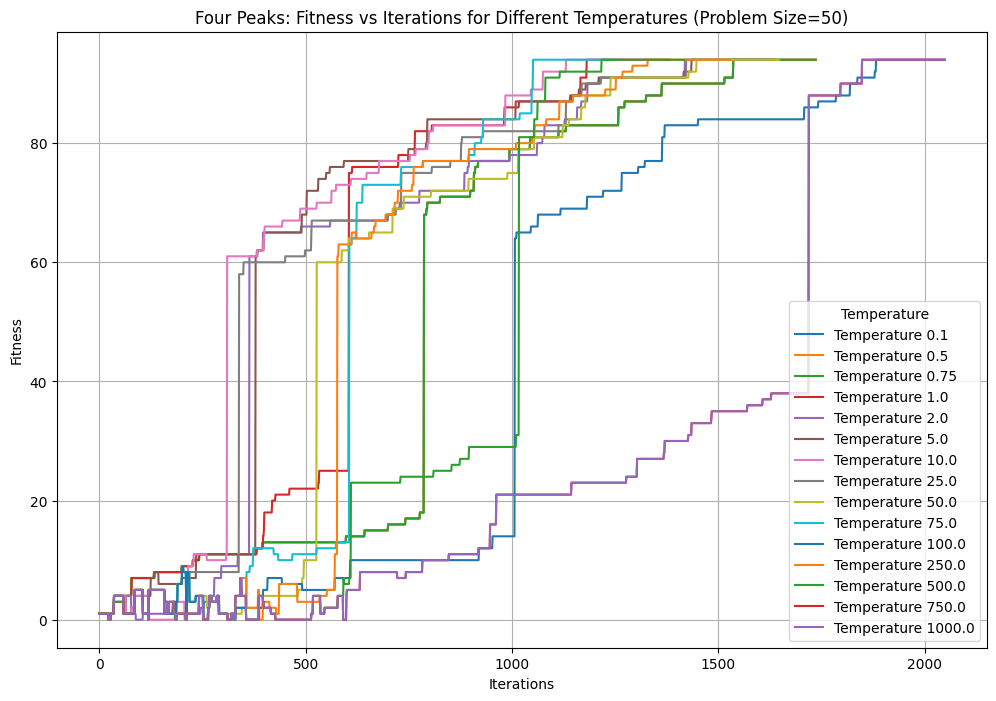

In [60]:
def extract_initial_temperature(temp):
    """Extracts initial temperature from a GeomDecay object or returns the numeric value."""
    if isinstance(temp, str) and 'GeomDecay' in temp:
        # Assuming the temperature is embedded in a string like 'GeomDecay(init_temp=10.0)'
        import re
        match = re.search(r'init_temp=([\d.]+)', temp)
        if match:
            return float(match.group(1))
    elif isinstance(temp, float):
        return temp
    else:
        raise ValueError(f"Unexpected temperature format: {temp}")

def plot_fitness_iterations(csv_path):
    # Load the CSV file
    df_temp_size100 = pd.read_csv('sa_4peaks_temp_01_to_1000_attempts200_results.csv')
    
    # Extract and handle temperature values correctly
    df_temp_size100['Temperature'] = df_temp_size100['Temperature'].apply(extract_initial_temperature)
    
    # Plot fitness over iterations for each temperature
    plt.figure(figsize=(12, 8))
    
    temperatures = df_temp_size100['Temperature'].unique()
    
    for temp in temperatures:
        temp_df = df_temp_size100[df_temp_size100['Temperature'] == temp]
        plt.plot(temp_df['Iteration'], temp_df['Fitness'], label=f'Temperature {temp}')
    
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.title('Four Peaks: Fitness vs Iterations for Different Temperatures (Problem Size=50)')
    plt.legend(title='Temperature')
    plt.grid(True)
    plt.show()

# Call the function with the CSV file path
plot_fitness_iterations('/mnt/data/sa_4peaks_temp_0.1_to_1000_attempts200_results.csv')


Low temperatures (0.1-25) converge quickly, at around at most 500 iterations. This suggests that the algorithm quickly settles into a solution but may get trapped in local optima due to limited exploration.

Medium-high temperatures (5-50) gradually increase in fitness over iterations. These do well with more iterations as they explore the solution space more effectively which leads to higher fitness values with more iterations.

Very high temperatures (500-1000) start slower but eventually achieve high fitness levels. The high initial temperature allows for extensive exploration and prevents early convergence. This allows it to potentially find better solutions.

In [66]:
df_temp_size50 = pd.read_csv('sa_4peaks_temp_01_to_1000_attempts200_results.csv')

best_fitness = df_temp_size50['Fitness'].max()
best_runs = df_temp_size50[df_temp_size50['Fitness'] == best_fitness]

HTML(best_runs.to_html())

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
1536,1536,0.877813,94.0,2318.0,0.10,2048
1537,1537,0.878379,94.0,2319.0,0.10,2048
1538,1538,0.878933,94.0,2320.0,0.10,2048
1539,1539,0.879487,94.0,2321.0,0.10,2048
1540,1540,0.880041,94.0,2322.0,0.10,2048
1541,1541,0.880591,94.0,2323.0,0.10,2048
1542,1542,0.881140,94.0,2324.0,0.10,2048
1543,1543,0.881762,94.0,2325.0,0.10,2048
1544,1544,0.882359,94.0,2326.0,0.10,2048
1545,1545,0.882925,94.0,2327.0,0.10,2048


In [67]:
maximum_evaluations = best_runs['FEvals'].max()

best_curve_run = best_runs[best_runs['FEvals'] == maximum_evaluations]
HTML(best_curve_run.to_html())

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
22749,2048,0.094739,94.0,3300.0,750.0,2048
24798,2048,0.094739,94.0,3300.0,1000.0,2048


Best initial temperature for a problem size of 50 is either 750 or 1000. Either option is fine because it returns the same fitness and FEval

#### graph fitness/iteration for different temperatures at problem size = 100

In [54]:
sa_runner = mlrose.SARunner(problem=fourpeaks_problem_100,
                            experiment_name="SA_4peaks_Experiment",
                            output_directory=None,  
                            seed=55,
                            iteration_list=2**np.arange(12),  
                            max_attempts=200,
                            temperature_list=[0.1, 0.5, 0.75, 1.0, 2.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0],
                            decay_list=[mlrose_hiive.GeomDecay])
# sa_runner.run()

# Run the experiment
sa_run_stats, sa_run_curves = sa_runner.run()

In [55]:
sa_run_curves.to_csv('sa_4peaks_temp_0.1_to_1000_problemsize100_results.csv', index=False)

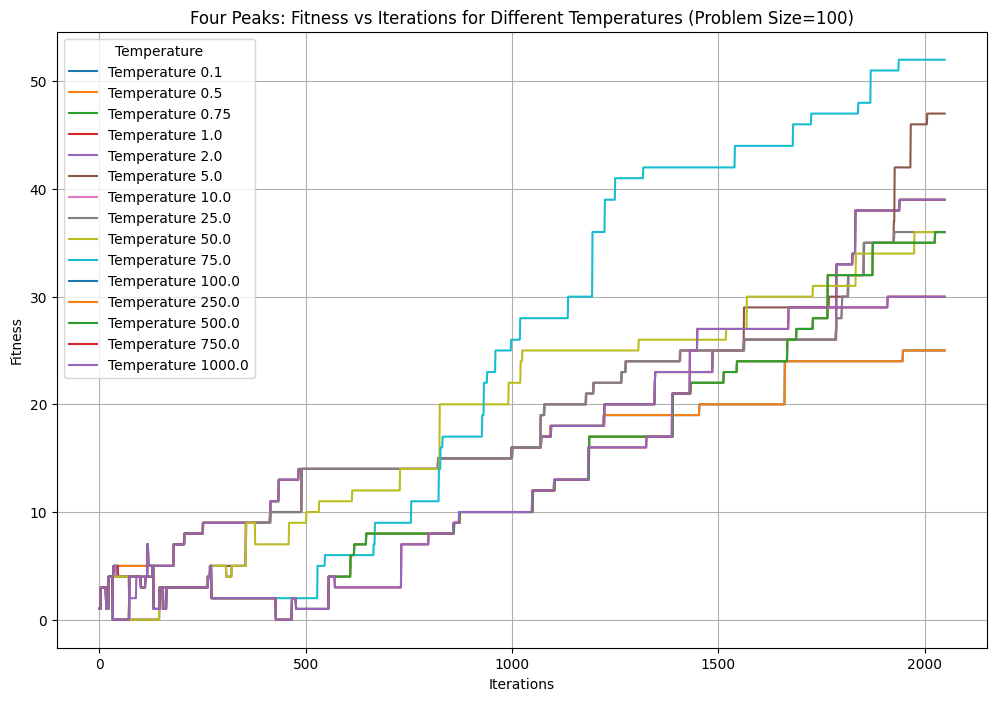

In [56]:
def extract_initial_temperature(temp):
    """Extracts initial temperature from a GeomDecay object or returns the numeric value."""
    if isinstance(temp, str) and 'GeomDecay' in temp:
        # Assuming the temperature is embedded in a string like 'GeomDecay(init_temp=10.0)'
        import re
        match = re.search(r'init_temp=([\d.]+)', temp)
        if match:
            return float(match.group(1))
    elif isinstance(temp, float):
        return temp
    else:
        raise ValueError(f"Unexpected temperature format: {temp}")

def plot_fitness_iterations(csv_path):
    # Load the CSV file
    df = pd.read_csv('sa_4peaks_temp_0.1_to_1000_problemsize100_results.csv')
    
    # Extract and handle temperature values correctly
    df['Temperature'] = df['Temperature'].apply(extract_initial_temperature)
    
    # Plot fitness over iterations for each temperature
    plt.figure(figsize=(12, 8))
    
    temperatures = df['Temperature'].unique()
    
    for temp in temperatures:
        temp_df = df[df['Temperature'] == temp]
        plt.plot(temp_df['Iteration'], temp_df['Fitness'], label=f'Temperature {temp}')
    
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.title('Four Peaks: Fitness vs Iterations for Different Temperatures (Problem Size=100)')
    plt.legend(title='Temperature')
    plt.grid(True)
    plt.show()

# Call the function with the CSV file path
plot_fitness_iterations('/mnt/data/sa_4peaks_temp_0.1_to_1000_attempts200_results.csv')


In [68]:
df_temp_size100 = pd.read_csv('sa_4peaks_temp_0.1_to_1000_problemsize100_results.csv')

best_fitness = df_temp_size100['Fitness'].max()
best_runs = df_temp_size100[df_temp_size100['Fitness'] == best_fitness]

HTML(best_runs.to_html())

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
20378,1937,1.758488,52.0,3416.0,75.0,2048
20379,1938,1.759171,52.0,3417.0,75.0,2048
20380,1939,1.759874,52.0,3418.0,75.0,2048
20381,1940,1.760574,52.0,3419.0,75.0,2048
20382,1941,1.761257,52.0,3421.0,75.0,2048
20383,1942,1.761957,52.0,3423.0,75.0,2048
20384,1943,1.764793,52.0,3424.0,75.0,2048
20385,1944,1.766178,52.0,3426.0,75.0,2048
20386,1945,1.766958,52.0,3427.0,75.0,2048
20387,1946,1.768165,52.0,3428.0,75.0,2048


In [69]:
maximum_evaluations = best_runs['FEvals'].max()

best_curve_run = best_runs[best_runs['FEvals'] == maximum_evaluations]
HTML(best_curve_run.to_html())

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
20489,2048,1.849531,52.0,3582.0,75.0,2048


For a problem size of 100, temperature 75 is best.

#### plot fitness/iteration for diff temps (problem size=25)

In [57]:
sa_runner = mlrose.SARunner(problem=fourpeaks_problem_25,
                            experiment_name="SA_4peaks_Experiment",
                            output_directory=None,  
                            seed=55,
                            iteration_list=2**np.arange(12),  
                            max_attempts=200,
                            temperature_list=[0.1, 0.5, 0.75, 1.0, 2.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0],
                            decay_list=[mlrose_hiive.GeomDecay])
# sa_runner.run()

# Run the experiment
sa_run_stats, sa_run_curves = sa_runner.run()

In [58]:
sa_run_curves.to_csv('sa_4peaks_temp_0.1_to_1000_problemsize25_results.csv', index=False)

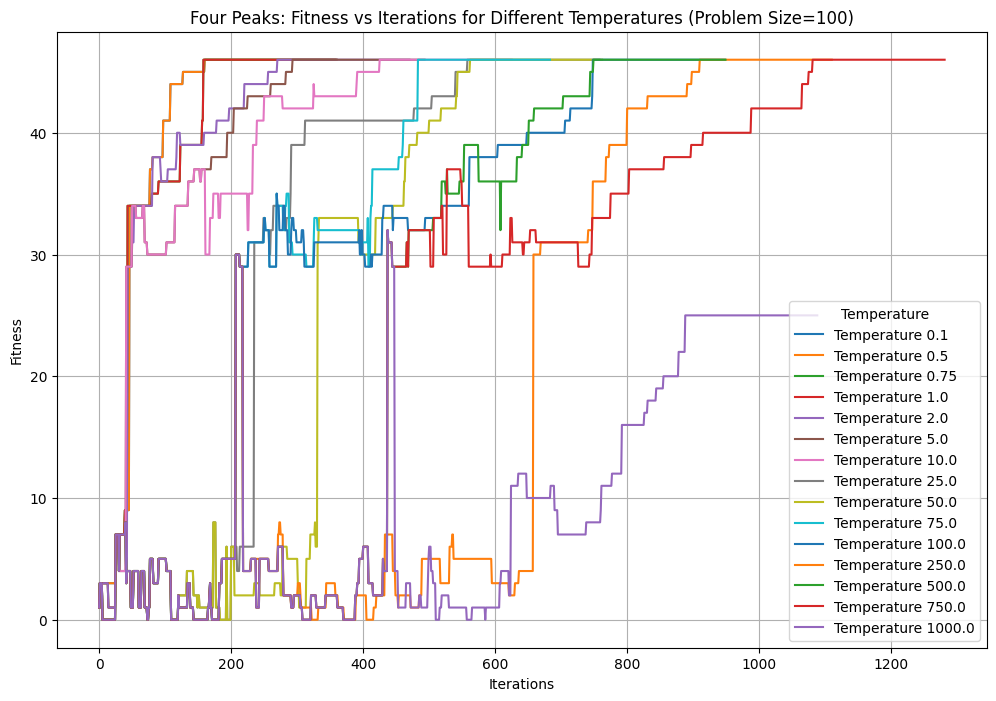

In [59]:
def extract_initial_temperature(temp):
    """Extracts initial temperature from a GeomDecay object or returns the numeric value."""
    if isinstance(temp, str) and 'GeomDecay' in temp:
        # Assuming the temperature is embedded in a string like 'GeomDecay(init_temp=10.0)'
        import re
        match = re.search(r'init_temp=([\d.]+)', temp)
        if match:
            return float(match.group(1))
    elif isinstance(temp, float):
        return temp
    else:
        raise ValueError(f"Unexpected temperature format: {temp}")

def plot_fitness_iterations(csv_path):
    # Load the CSV file
    df = pd.read_csv('sa_4peaks_temp_0.1_to_1000_problemsize25_results.csv')
    
    # Extract and handle temperature values correctly
    df['Temperature'] = df['Temperature'].apply(extract_initial_temperature)
    
    # Plot fitness over iterations for each temperature
    plt.figure(figsize=(12, 8))
    
    temperatures = df['Temperature'].unique()
    
    for temp in temperatures:
        temp_df = df[df['Temperature'] == temp]
        plt.plot(temp_df['Iteration'], temp_df['Fitness'], label=f'Temperature {temp}')
    
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.title('Four Peaks: Fitness vs Iterations for Different Temperatures (Problem Size=100)')
    plt.legend(title='Temperature')
    plt.grid(True)
    plt.show()

# Call the function with the CSV file path
plot_fitness_iterations('/mnt/data/sa_4peaks_temp_0.1_to_1000_attempts200_results.csv')


In [70]:
df_temp_size25 = pd.read_csv('sa_4peaks_temp_0.1_to_1000_problemsize25_results.csv')

best_fitness = df_temp_size25['Fitness'].max()
best_runs = df_temp_size25[df_temp_size25['Fitness'] == best_fitness]

HTML(best_runs.to_html())

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
160,160,0.181857,46.0,218.0,0.10,2048
161,161,0.182442,46.0,219.0,0.10,2048
162,162,0.182717,46.0,220.0,0.10,2048
163,163,0.182925,46.0,221.0,0.10,2048
164,164,0.183118,46.0,222.0,0.10,2048
165,165,0.183310,46.0,223.0,0.10,2048
166,166,0.183506,46.0,224.0,0.10,2048
167,167,0.183699,46.0,225.0,0.10,2048
168,168,0.183897,46.0,226.0,0.10,2048
169,169,0.184064,46.0,227.0,0.10,2048


In [71]:
maximum_evaluations = best_runs['FEvals'].max()

best_curve_run = best_runs[best_runs['FEvals'] == maximum_evaluations]
HTML(best_curve_run.to_html())

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
9528,1281,0.048428,46.0,2012.0,750.0,2048


For a problem size of 25, a temperature of 750 is best.